<a href="https://colab.research.google.com/github/HomayounSoleimani/Python-for-Machine-Learning-and-Artificial-Neural-Networks/blob/master/1_02_Linear_Regression_on_predicting_a_Pulsar_Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting a pulsar star using linear regression.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [10]:
heading = [' Mean of the integrated profile', ' Standard deviation of the integrated profile',
           ' Excess kurtosis of the integrated profile', 'Skewness of the integrated profile',
           ' Mean of the deviation of the DM-SNR curve', ' Standard deviation of deviation of the DM-SNR curve',
           ' Excess kurtosis of deviation of the DM-SNR curve', ' Skewness deviation of the DM-SNR curve', 'target_class']
           
dataset = pd.read_csv('pulsar_stars.csv', names = heading)
dataset = dataset.dropna()
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the deviation of the DM-SNR curve,Standard deviation of deviation of the DM-SNR curve,Excess kurtosis of deviation of the DM-SNR curve,Skewness deviation of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [11]:
# getting X-data
X_data = dataset.iloc[:,0:-1].values

# Scaling the data
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)
X_data[0:5]

array([[ 1.14931702,  1.33483164, -0.66956953, -0.400459  , -0.31944026,
        -0.37062547, -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, -0.37053549, -0.37110188,
        -0.5889241 ,  0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, -0.11659286, -0.32210703,
        -0.23532816, -0.12599609, -0.39137346],
       [ 1.0006944 ,  1.55325441, -0.51340862, -0.39017809, -0.3044042 ,
        -0.27566649, -0.31226539, -0.4813003 ],
       [-0.87140244, -0.85887881,  0.11560871, -0.10486616, -0.38801036,
        -0.76311112,  1.32402614,  1.38679399]])

In [12]:
# Getting Y_data
Y_data = dataset.iloc[:,-1].values
Y_data[0:5]

array([0, 0, 0, 0, 0])

In [13]:
# printing number of instances of each possible target_class variables
unique , counts = np.unique(Y_data, return_counts=True)
print(unique, counts)

[0 1] [16259  1639]


In [15]:
# Spliting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data)
# Define and fit model to train dataset
classifier = LinearRegression()
classifier.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('Score on training data : {:.3f}'.format(classifier.score(x_train, y_train)))
print('Score on testing data : {:.3f}'.format(classifier.score(x_test, y_test)))

Score on training data : 0.671
Score on testing data : 0.716


In [19]:
results = cross_val_score(classifier, x_test, y_test, cv =5)
print(results)

[0.76305278 0.73456898 0.69882458 0.68185804 0.69095201]


In [0]:
# in the best scenario we get an accuracy score of 72.4%

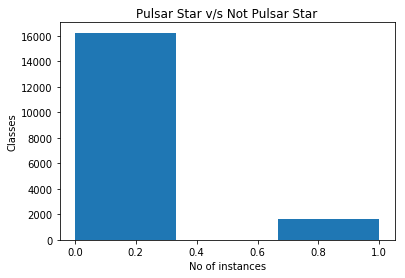

In [21]:
plt.hist(Y_data, bins=3)
plt.title("Pulsar Star v/s Not Pulsar Star")
plt.xlabel('No of instances')
plt.ylabel('Classes')
plt.show()